<a href="https://colab.research.google.com/github/Wuel1/calculonumerico/blob/main/Atividade_07_PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

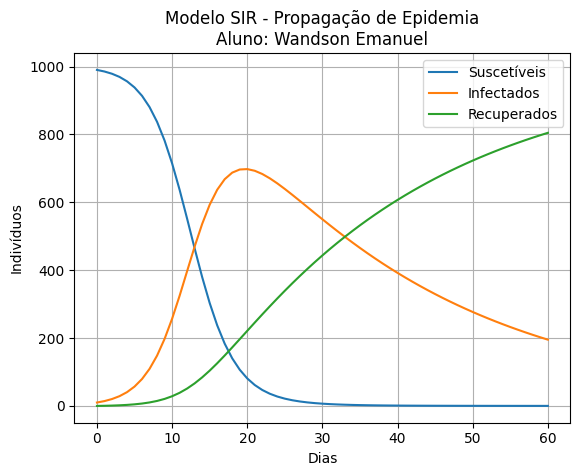

In [1]:
import numpy as np
import matplotlib.pyplot as plt

taxa_transmissao = 0.4
taxa_recuperacao = 0.035
populacao_total = 1000

# Condições iniciais
suscetiveis_iniciais = 990
infectados_iniciais = 10
recuperados_iniciais = 0

def taxa_variacao_suscetiveis(suscetiveis, infectados):
    return - (taxa_transmissao / populacao_total) * suscetiveis * infectados

def taxa_variacao_infectados(suscetiveis, infectados):
    return (taxa_transmissao / populacao_total) * suscetiveis * infectados - taxa_recuperacao * infectados

def taxa_variacao_recuperados(infectados):
    return taxa_recuperacao * infectados

def passo_runge_kutta2(suscetiveis, infectados, recuperados, passo_tempo):
    taxa_variacao_s1 = taxa_variacao_suscetiveis(suscetiveis, infectados)
    taxa_variacao_i1 = taxa_variacao_infectados(suscetiveis, infectados)
    taxa_variacao_r1 = taxa_variacao_recuperados(infectados)

    taxa_variacao_s2 = taxa_variacao_suscetiveis(suscetiveis + passo_tempo * taxa_variacao_s1, infectados + passo_tempo * taxa_variacao_i1)
    taxa_variacao_i2 = taxa_variacao_infectados(suscetiveis + passo_tempo * taxa_variacao_s1, infectados + passo_tempo * taxa_variacao_i1)
    taxa_variacao_r2 = taxa_variacao_recuperados(infectados + passo_tempo * taxa_variacao_i1)

    suscetiveis_atualizados = suscetiveis + (passo_tempo / 2) * (taxa_variacao_s1 + taxa_variacao_s2)
    infectados_atualizados = infectados + (passo_tempo / 2) * (taxa_variacao_i1 + taxa_variacao_i2)
    recuperados_atualizados = recuperados + (passo_tempo / 2) * (taxa_variacao_r1 + taxa_variacao_r2)

    return suscetiveis_atualizados, infectados_atualizados, recuperados_atualizados


dias_simulacao = 60
passo_tempo = 1

numero_passos = int(dias_simulacao / passo_tempo)
suscetiveis_valores = np.zeros(numero_passos + 1)
infectados_valores = np.zeros(numero_passos + 1)
recuperados_valores = np.zeros(numero_passos + 1)

suscetiveis_valores[0] = suscetiveis_iniciais
infectados_valores[0] = infectados_iniciais
recuperados_valores[0] = recuperados_iniciais

# MODELO SIR
for i in range(numero_passos):
    suscetiveis_valores[i+1], infectados_valores[i+1], recuperados_valores[i+1] = passo_runge_kutta2(suscetiveis_valores[i], infectados_valores[i], recuperados_valores[i], passo_tempo)

dia_pico = np.argmax(infectados_valores)
pico_infeccoes = infectados_valores[dia_pico]
tempo = np.arange(0, dias_simulacao + passo_tempo, passo_tempo)

dia_controle = np.argmax((recuperados_valores >= infectados_valores) & (tempo >= 30) & (tempo <= 40))
dia_inicio_controle = np.argmax(infectados_valores < 10)
dia_inicio_reducao = np.argmax(np.diff(infectados_valores) < 0) + 1

plt.plot(tempo, suscetiveis_valores, label='Suscetíveis')
plt.plot(tempo, infectados_valores, label='Infectados')
plt.plot(tempo, recuperados_valores, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('Indivíduos')
plt.title('Modelo SIR - Propagação de Epidemia\nAluno: Wandson Emanuel')
plt.legend()
plt.grid()

plt.show()

In [2]:
print('Pico da epidemia:', dia_pico )
print('Dia em que a epidemia começa a reduzir:' , dia_inicio_reducao)
print('Número de infectados no pico:' , int(pico_infeccoes))
print('Dia que começa a fica controlada:', dia_inicio_controle)
print('Dia  que a epidemia é considerada controlada:' , dia_controle)

Pico da epidemia: 20
Dia em que a epidemia começa a reduzir: 21
Número de infectados no pico: 697
Dia que começa a fica controlada: 0
Dia  que a epidemia é considerada controlada: 33
